# What makes us happy?

## An analysis conducted to find out what really brings happiness to the world
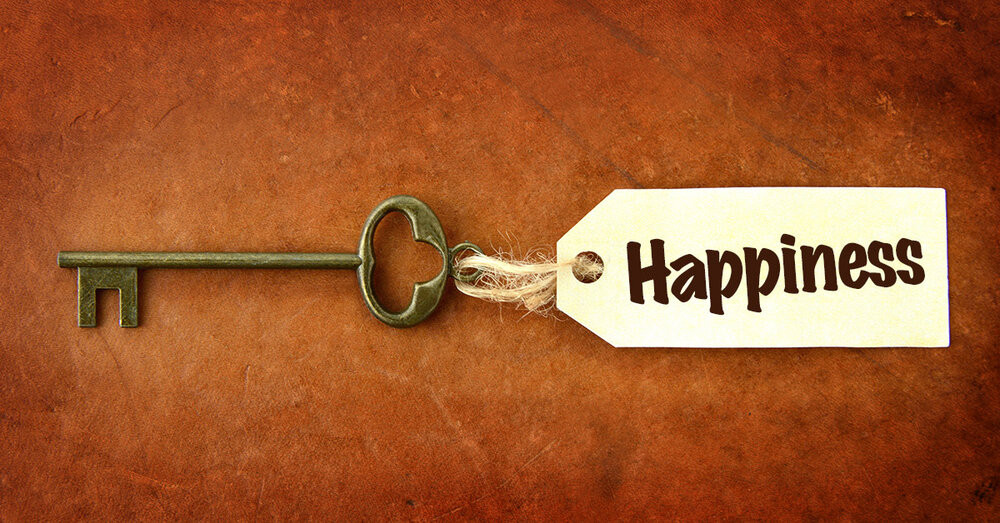

### Introduction :

To get a feel for the state of global contentment, the World Happiness Report was suggested. Although i used the data points throughout our analysis, i realized in the end that possibly i won't be able to use just the variables in this report to effectively estimate the happiness of a country because "happy" is so subjective.

For the purpose of calculating the World Happiness Index,  different indicators are collected from each country.

They are as follows:

1. Gross Domestic Product per Capita (GDP per Capita) - Gross Domestic Product per Capita (GDP per Capita) for each country.

2. Family - Family Satisfaction Rank

3. Life Expectancy - the average number of years one can expect to live.

4. Freedom - Measuring people's perceptions of freedom

5. Generosity - A numerical value calculated based on poll participants' perceptions of generosity in their country.

6. Government Corruption/Trust - A measurement of the public's trust in their governments.

7. Dystopia Residual - A score based on a hypothetical comparison to the world's saddest country.

8. Continent - Region of the country.

9. CPI score - The Corruption Perceptions Index (CPI) is an index which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

10. Year - Yearly measures of the attributes.

11. Country

12. social support - Social support is the perception and actuality that one is cared for, has assistance available from other people, and most popularly, that one is part of a supportive social network. 

The report's Happiness Score is actually an average of responses to the primary life evaluation question from the Gallup World Poll (GWP), which employs the Cantril Ladder.



Cantril Ladder included a level called the Cantril step, in which respondents were asked to imagine the best life they could imagine and then rate their existing life using it as a baseline.

#### Problem statement : 

1. Understand which factors are most relevant to predict Happiness score.
2. Visualize and analyze relation between these factors.
3. Create different models to predict happiness score (Linear regression,MLP,Stepwise forward RF,KNN,GBR).


In [1]:
import pandas as pd 
import numpy as np  #For mathematical calculatons
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt # For plotting graphs
import plotly.graph_objs as go
import warnings      #To ignore warnings
warnings.filterwarnings ("ignore")

In [2]:
#hide
## Ground work
#loading individual dataset reports for the years from 2015-2020
happiness_df_2015 = pd.read_csv("data/2015_report.csv")
happiness_df_2016 = pd.read_csv("data/2016_report.csv")
happiness_df_2017 = pd.read_csv("data/2017_report.csv")
happiness_df_2018 = pd.read_csv("data/2018_report.csv")
happiness_df_2019 = pd.read_csv("data/2019_report.csv")
happiness_df_2020 = pd.read_csv("data/2020_report.csv")

df2=pd.read_csv("data/CPI-SCORES.csv") #We loaded the data into the dataframe.

#adding column in each dataset to represent year
happiness_df_2015['Year'] = 2015
happiness_df_2016['Year'] = 2016
happiness_df_2017['Year'] = 2017
happiness_df_2018['Year'] = 2018
happiness_df_2019['Year'] = 2019
happiness_df_2020['Year'] = 2020

In [3]:
df = pd.DataFrame()

#merging all dataframes into one dataframe
df = df.append(happiness_df_2015)
df = df.append(happiness_df_2016)
df = df.append(happiness_df_2017)
df = df.append(happiness_df_2018)
df = df.append(happiness_df_2019)
df = df.append(happiness_df_2020)




#replacing na with 0
df = df.fillna(0)
df = pd.merge(df, df2, on=['Country', 'Year'])
dff = df.drop(['Country','continent','Year'], axis = 1)


In [4]:
df.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 86.6+ KB


In [6]:
df['Country'].nunique()

132

In [7]:
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

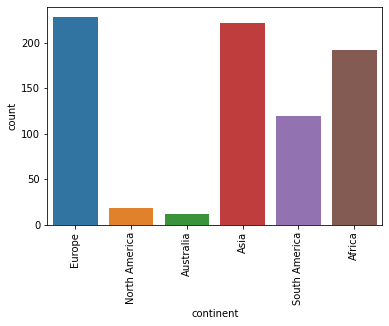

In [8]:
sns.countplot(df['continent'])
plt.xticks(rotation=90)
plt.show()

In [9]:
#hide_input
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

happiness_score  gdp_per_capita    family    health  \
happiness_score           1.000000        0.796952  0.139737  0.765699   
gdp_per_capita            0.796952        1.000000  0.215922  0.770263   
family                    0.139737        0.215922  1.000000 -0.074117   
health                    0.765699        0.770263 -0.074117  1.000000   
freedom                   0.549513        0.360422  0.006478  0.415357   
generosity                0.138579       -0.002301  0.227875 -0.019394   
government_trust          0.351135        0.287957  0.102359  0.210789   
dystopia_residual         0.233622        0.064533  0.557576 -0.045528   
Year                      0.025435       -0.042062 -0.591407  0.070242   
social_support            0.239110        0.142498 -0.855444  0.387623   
cpi_score                 0.622027        0.735174  0.113448  0.685520   

                    freedom  generosity  government_trust  dystopia_residual  \
happiness_score    0.549513    0.138579          0.351135           0.233622   
gdp_per_capita     0.360422   -0.002301          0.287957           0.064533   
family             0.006478    0.227875          0.102359           0.557576   
health             0.415357   -0.019394          0.210789          -0.045528   
freedom            1.000000    0.339178          0.441906           0.003327   
generosity         0.339178    1.000000          0.234489           0.160056   
government_trust   0.441906    0.234489          1.000000           0.137310   
dystopia_residual  0.003327    0.160056          0.137310           1.000000   
Year               0.059778   -0.104285          0.022828           0.089763   
social_support     0.236287   -0.182996         -0.010907          -0.594248   
cpi_score          0.422193    0.065831          0.333023           0.042921   

                       Year  social_support  cpi_score  
happiness_score    0.025435        0.239110   0.622027  
gdp_per_capita    -0.042062        0.142498   0.735174  
family            -0.591407       -0.855444   0.113448  
health             0.070242        0.387623   0.685520  
freedom            0.059778        0.236287   0.422193  
generosity        -0.104285       -0.182996   0.065831  
government_trust   0.022828       -0.010907   0.333023  
dystopia_residual  0.089763       -0.594248   0.042921  
Year               1.000000        0.426961   0.005542  
social_support     0.426961        1.000000   0.147637  
cpi_score          0.005542        0.147637   1.000000

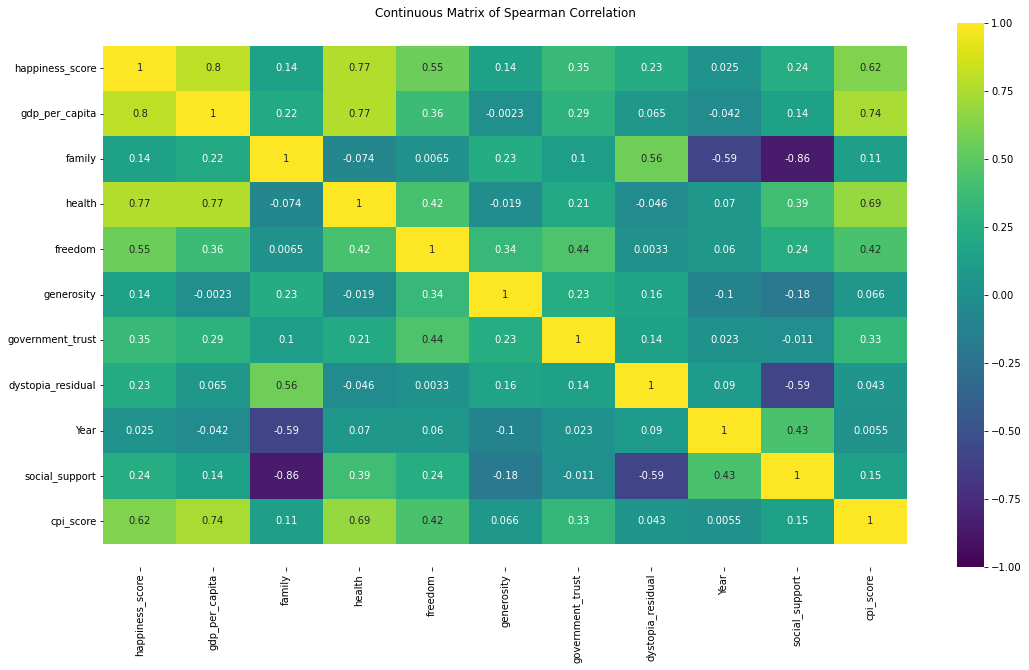

In [10]:
#hide_input
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, 
            center=0, cmap="viridis", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Continuous Matrix of Spearman Correlation");

In [11]:
spearman_cormatrix['happiness_score'].sort_values(ascending=False)

happiness_score      1.000000
gdp_per_capita       0.796952
health               0.765699
cpi_score            0.622027
freedom              0.549513
government_trust     0.351135
social_support       0.239110
dystopia_residual    0.233622
family               0.139737
generosity           0.138579
Year                 0.025435
Name: happiness_score, dtype: float64

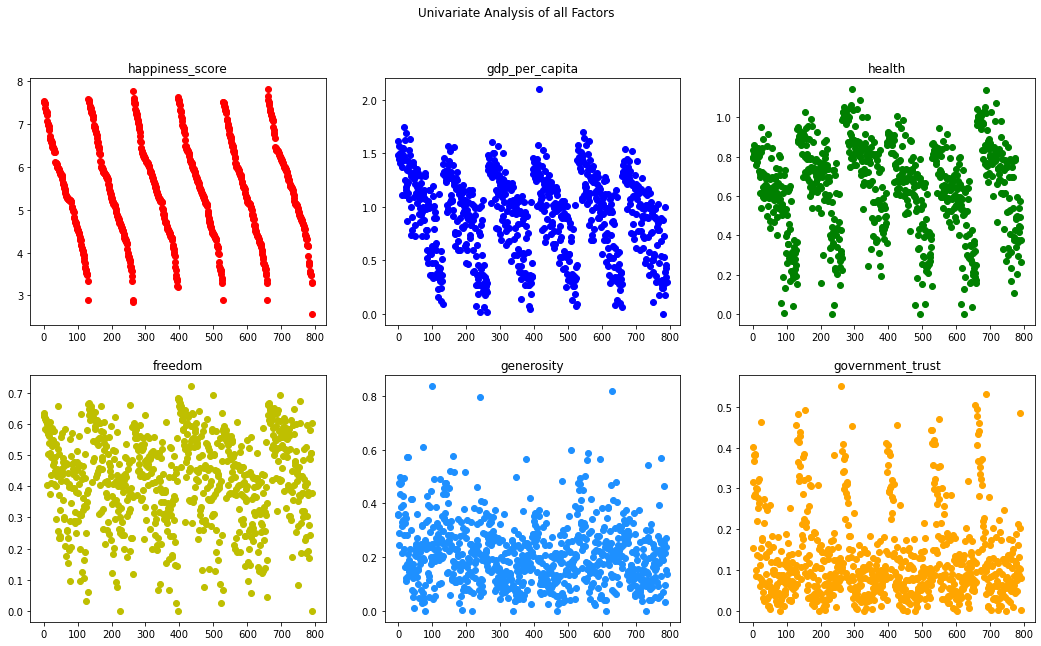

In [12]:
#hide_input
#univariate analysis
numerics = ['happiness_score', 'gdp_per_capita', 'health', 'freedom', 'generosity',
       'government_trust']
color = ['r','blue','g','y','dodgerblue','orange']

plt.figure(figsize = (18,10))
plt.suptitle("Univariate Analysis of all Factors")
for i in numerics:
    plt.subplot(2,3,numerics.index(i)+1)
    plt.scatter(np.arange(df.shape[0]),df[i], color = color[numerics.index(i)])
    plt.title(i)
plt.show()

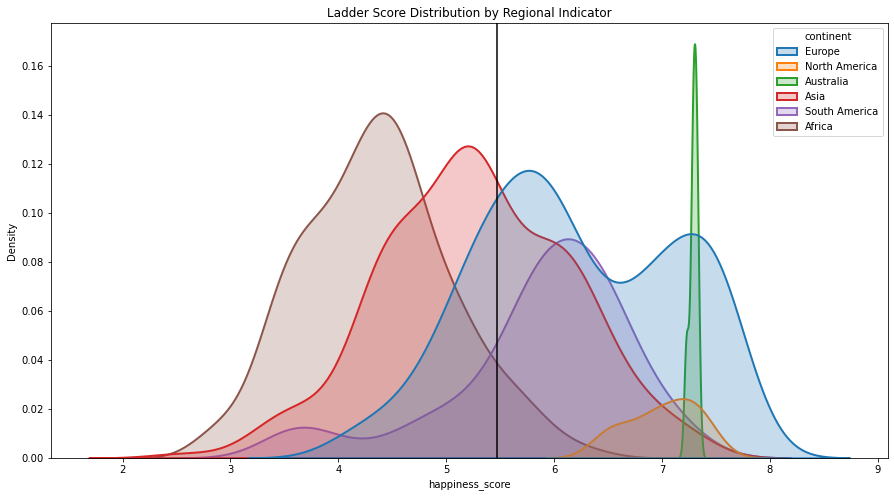

In [13]:
#Ladder Score Distribution by Regional Indicator
plt.figure(figsize = (15,8))
sns.kdeplot(df["happiness_score"], hue = df["continent"], fill = True, linewidth = 2)
plt.axvline(df["happiness_score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

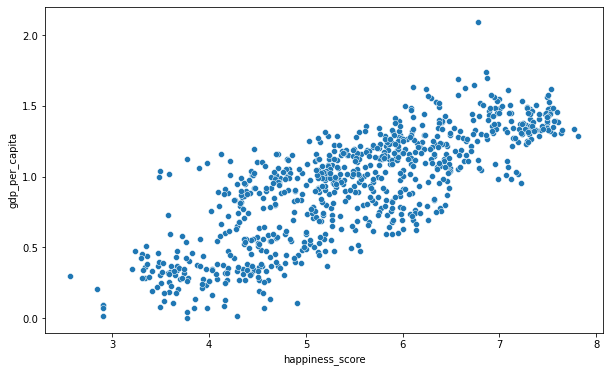

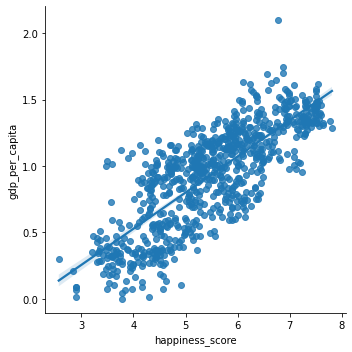

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='happiness_score',y='gdp_per_capita',data=df)
sns.lmplot(x='happiness_score',y='gdp_per_capita',data=df)

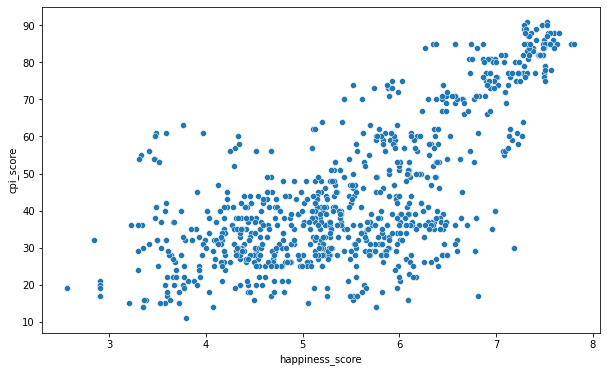

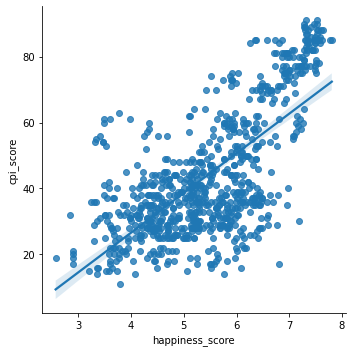

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='happiness_score',y='cpi_score',data=df)
sns.lmplot(x='happiness_score',y='cpi_score',data=df)

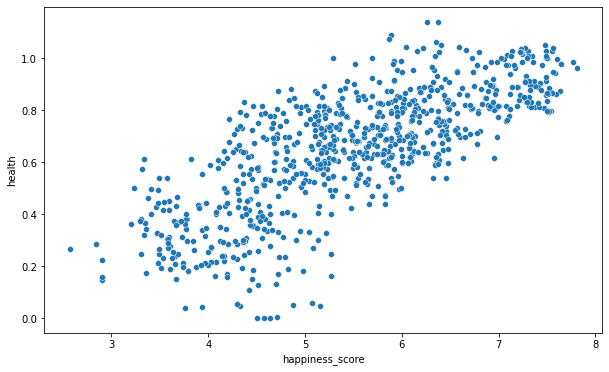

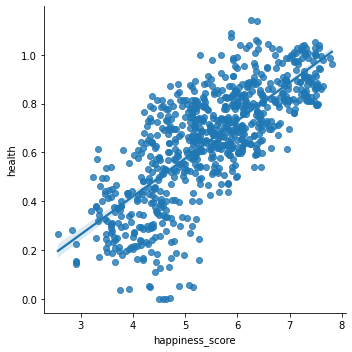

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='happiness_score',y='health',data=df)
sns.lmplot(x='happiness_score',y='health',data=df)

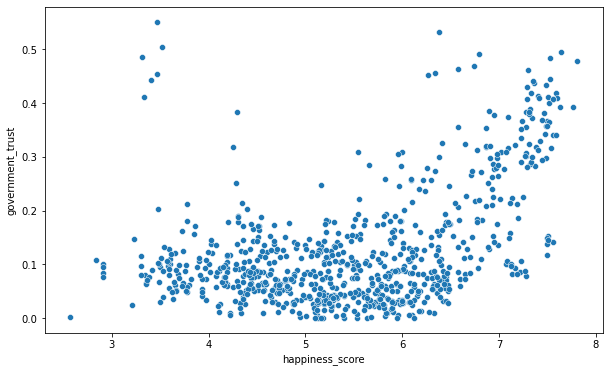

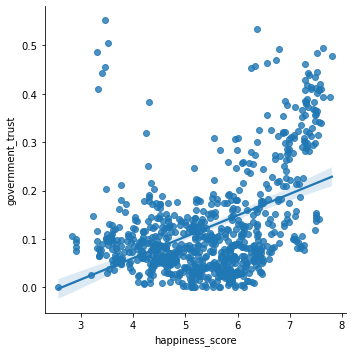

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='happiness_score',y='government_trust',data=df)
sns.lmplot(x='happiness_score',y='government_trust',data=df)

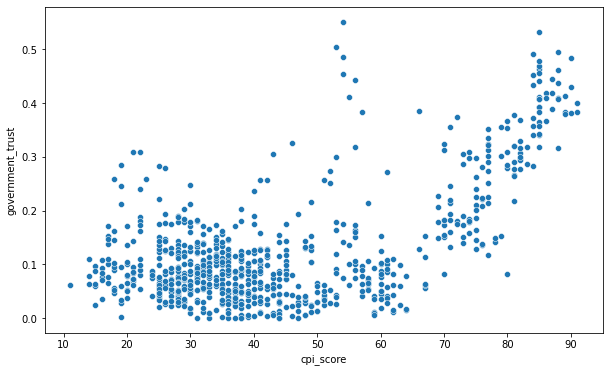

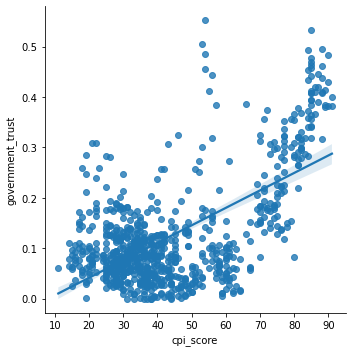

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='cpi_score',y='government_trust',data=df)
sns.lmplot(x='cpi_score',y='government_trust',data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 86.6+ KB


In [20]:
import plotly.express as px
fig = px.choropleth(df.sort_values("Year"),
                   locations= 'Country',
                   color = "happiness_score",
                   locationmode = 'country names',
                    animation_frame = 'Year'
                   )
fig.update_layout(title= "Happiness score Comprasion by Countries")

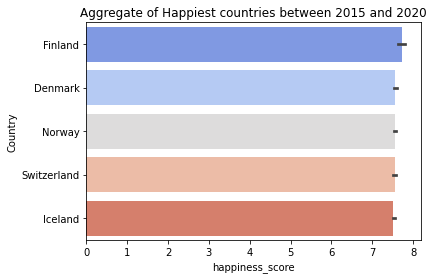

In [21]:
df2021_happiest = df[((df["happiness_score"] > 7.5) & (df["Year"] <= 2020))]

df2021_happiest.sort_values(by=['happiness_score'], ascending=False,inplace=True)
df2021_happiest.sort_values(by=['happiness_score'])
                     
# sort dataframe
sns.barplot(x = "happiness_score",
            y = "Country", 
            data=df2021_happiest, palette = "coolwarm")

plt.title("Aggregate of Happiest countries between 2015 and 2020")


plt.show()


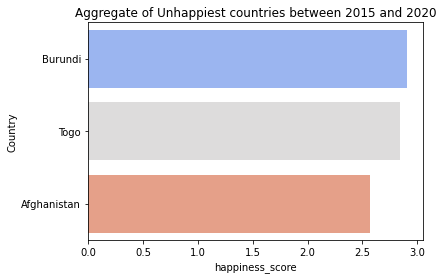

In [22]:
df2021_unhappiest = df[((df["happiness_score"] < 3.2) & (df["Year"] <= 2020))]
# sort dataframe

df2021_unhappiest.sort_values(by=['happiness_score'], ascending=False,inplace=True)

sns.barplot(x = "happiness_score",
            y = "Country", 
            data=df2021_unhappiest, palette = "coolwarm")

plt.title("Aggregate of Unhappiest countries between 2015 and 2020")


plt.show()


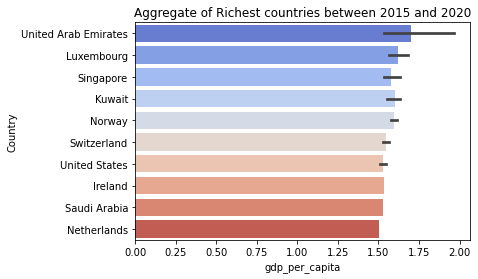

In [23]:
df2021_rich = df[((df["gdp_per_capita"] > 1.5) & (df["Year"] <= 2020))]

df2021_rich.sort_values(by=['gdp_per_capita'], ascending=False,inplace=True)

sns.barplot(x = "gdp_per_capita",
            y = "Country", 
            data=df2021_rich, palette = "coolwarm")

plt.title("Aggregate of Richest countries between 2015 and 2020")


plt.show()


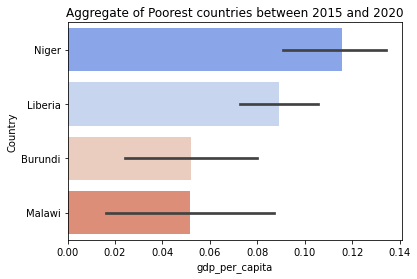

In [24]:
df2021_poor = df[((df["gdp_per_capita"] < 0.15) & (df["Year"] <= 2020))]

df2021_poor.sort_values(by=['gdp_per_capita'], ascending=False,inplace=True)

sns.barplot(x = "gdp_per_capita",
            y = "Country", 
            data=df2021_poor, palette = "coolwarm")

plt.title("Aggregate of Poorest countries between 2015 and 2020")


plt.show()


In [25]:
df2021_poor.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
362    Niger           4.6280        0.138000  0.000000  0.366000  0.318000   
646    Niger           3.8560        0.132700  0.605300  0.261620  0.380410   
511    Niger           4.1660        0.131000  0.000000  0.221000  0.390000   
126  Liberia           3.5330        0.119042  0.872118  0.229918  0.332881   
752    Niger           4.9096        0.108330  0.000000  0.298816  0.435312   

     generosity  government_trust  dystopia_residual continent  Year  \
362    0.188000          0.102000           0.000000    Africa  2017   
646    0.209700          0.171760           2.094690    Africa  2019   
511    0.175000          0.099000           0.000000    Africa  2018   
126    0.266550          0.038948           1.673286    Africa  2015   
752    0.208177          0.137555           3.017631    Africa  2020   

     social_support  cpi_score  
362          0.7740         33  
646          0.0000         32  
511          0.8670         34  
126          0.0000         37  
752          0.7038         32

In [26]:
fig = px.bar(df, x='Country', y='happiness_score',color='Year',height=800)
fig.update_layout(title='Arrangement of countries in descending order of Happiness Score',titlefont_size=20)

In [27]:
fig = px.scatter(df, x="happiness_score", y="cpi_score", color='government_trust')
fig.update_layout(title_text='Trust and corruption index by happiness', title_x=0.5)
# showing the plot
fig.show()

In [28]:
fig = px.scatter(df, x="freedom", y="cpi_score", color='government_trust')
fig.update_layout(title_text='Trust and corruption index by freedom', title_x=0.5)
# showing the plot
fig.show()

In [29]:
fig = px.scatter(df, x="happiness_score", y="cpi_score", color='freedom')
fig.update_layout(title_text='Freedom and corruption index by happiness', title_x=0.5)
# showing the plot
fig.show()

In [30]:
fig = px.scatter(df, x="happiness_score", y="cpi_score", color='health')
fig.update_layout(title_text='Corruption index and health by happiness', title_x=0.5)
# showing the plot
fig.show()

In [31]:
trace1 = [go.Choropleth(
               colorscale = 'tropic',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z =df['government_trust'],
               )]

layout = dict(title = 'Overview of World Government Trust',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
fig.show()

In [32]:
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z =df['gdp_per_capita'],
               )]

layout = dict(title = 'Overview of world Economy',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
fig.show()

In [33]:
trace1 = [go.Choropleth(
               colorscale = 'rainbow',
               locationmode = 'country names',
               locations = df['Country'],
               text = df['Country'], 
               z =df['happiness_score'],
               )]

layout = dict(title = 'Overview of World Happiness Score',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
fig.show()

In [34]:
fig=px.line(df,x='Year',y='happiness_score',color='Country',template="ggplot2")
fig.show()

In [35]:
fig = px.pie(df, values='gdp_per_capita', names='continent', title='Continent Wise Contribution to World Economy',height=650)
fig.show()

In [36]:
df.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [37]:
column_names = ["gdp_per_capita", "health", "cpi_score","freedom","government_trust","social_support","dystopia_residual","Country","Year","continent","generosity","family","happiness_score"]
df = df.reindex(columns=column_names)

In [38]:
#hide
#Splitting into predictors and response variable
X = df.drop(["happiness_score","Country","continent","Year","generosity","family"], axis=1)
y = df["happiness_score"]

In [39]:
X.head()

gdp_per_capita    health  cpi_score   freedom  government_trust  \
0        1.616463  0.796667         88  0.635423          0.315964   
1        1.482383  0.792566         91  0.626007          0.400770   
2        1.480633  0.833552         79  0.627163          0.153527   
3        1.564980  0.858131         86  0.620071          0.367007   
4        1.443572  0.809158         90  0.617951          0.382612   

   social_support  dystopia_residual  
0             0.0           2.277027  
1             0.0           2.313707  
2             0.0           2.322715  
3             0.0           2.276716  
4             0.0           2.430182

In [40]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ANOVA TEST
## UNIVARIATE ONE-WAY ANNOVA TEST
### Regression

In [42]:
# Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 
from sklearn.feature_selection import f_regression, SelectKBest

In [43]:
# apply SelectKBest class to extract top 30 best features
fs = SelectKBest(score_func=f_regression,k=7) ## Select k as per your business understaing
# Apply feature selection
fit = fs.fit(X_train,y_train)

In [44]:
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))

[0. 0. 0. 0. 0. 0. 0.]
[907.204 718.293 539.725 217.718 155.752  20.558  18.471]


In [45]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
print(feature_score.nlargest(7,columns="F_Score"))

      Input_Features     F_Score  P_Value
0     gdp_per_capita  907.204043      0.0
1             health  718.292941      0.0
2          cpi_score  539.725146      0.0
3            freedom  217.717877      0.0
4   government_trust  155.752497      0.0
5     social_support   20.557611      0.0
6  dystopia_residual   18.471024      0.0


# Linear Regression Algorithm

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8061464957978417

# MLP Neural Network algorithm
## Regression

In [49]:
#hide_input
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
hap_regr = MLPRegressor(hidden_layer_sizes=(100, 50, 25), solver='adam', random_state=1, max_iter=500)
hap_regr.fit(X_train, y_train)
score = hap_regr.score(X_test, y_test)
pred = hap_regr.predict(X_test)
mse = mean_squared_error(y_test,pred)
print("The MSE value of our model is: ", np.round(mse,2))
print("The R2 score of our model is : ", np.round(score,2))

The MSE value of our model is:  0.12
The R2 score of our model is :  0.9


# Random Forest 
## Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.7s finished

[2022-06-29 16:33:20] Features: 1/7 -- score: 0.4906768760550137[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.7s finished

[2022-06-29 16:33:23] Features: 2/7 -- score: 0.7296448978854073[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished

[2022-06-29 16:33:25] Features: 3/7 -- score: 0.8043771082050714[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

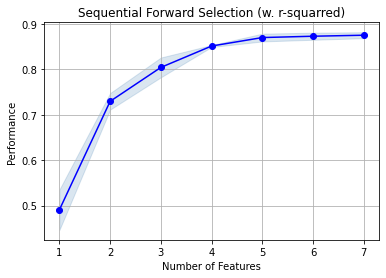

In [51]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. r-squarred)')
plt.grid()
plt.show()

In [52]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['gdp_per_capita', 'health', 'cpi_score', 'freedom', 'government_trust',
       'social_support', 'dystopia_residual'],
      dtype='object')

In [53]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6]


In [54]:

RFregress = RandomForestRegressor()
RFregress.fit(X_train, y_train)


y_test_pred = RFregress.predict(X_test)
print('Testing accuracy on all features: %.3f' % r2_score(y_test, y_test_pred))

Testing accuracy on all features: 0.905


# KNN 
## Regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

In [56]:
sfs2 = SFS(RegModel, 
          k_features=7, 
          forward=True, 
          floating=False,
          verbose=2,
          scoring='r2',
          cv=4)
sfs2 = sfs2.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-06-29 16:33:31] Features: 1/7 -- score: 0.5508695827735437[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-06-29 16:33:31] Features: 2/7 -- score: 0.7403317799170747[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-06-29 16:33:31] Features: 3/7 -- score: 0.8233798963557115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [57]:
sfs2.k_feature_names_

('gdp_per_capita',
 'health',
 'cpi_score',
 'freedom',
 'government_trust',
 'social_support',
 'dystopia_residual')

In [58]:
# Build full model on ALL features
KNregress = KNeighborsRegressor(n_neighbors=4)

KNregress.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=4)

In [59]:
y_test_pred = KNregress.predict(X_test)
print('Testing accuracy on selected features: %.3f' % r2_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.889


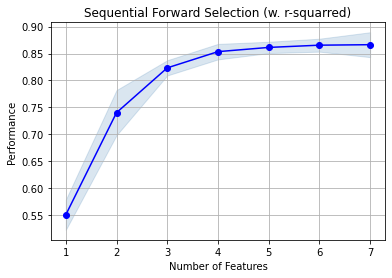

In [60]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs2.get_metric_dict())

plt.title('Sequential Forward Selection (w. r-squarred)')
plt.grid()
plt.show()

# KNN
## Feature selection
### Regression

In [61]:
sfs2 = SFS(RegModel, 
          k_features=6, 
          forward=False, 
          floating=False,
          verbose=2,
          scoring='r2',
          cv=4)
sfs2 = sfs2.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-06-29 16:33:31] Features: 6/6 -- score: 0.8673458747631771

In [62]:
sfs2.k_feature_names_

('gdp_per_capita',
 'health',
 'cpi_score',
 'freedom',
 'government_trust',
 'dystopia_residual')

In [63]:
feat_cols = list(sfs2.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6]


In [64]:
# Build full model with selected features
KNregress = KNeighborsRegressor(n_neighbors=4)

KNregress.fit(X_train.iloc[:, feat_cols], y_train)


KNeighborsRegressor(n_neighbors=4)

In [65]:
y_test_pred = KNregress.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % r2_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.872


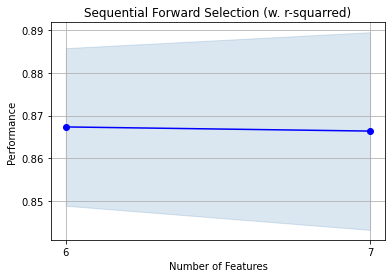

In [66]:
fig = plot_sfs(sfs2.get_metric_dict())

plt.title('Sequential Forward Selection (w. r-squarred)')
plt.grid()
plt.show()

# Gradient Boosting 
## Regression

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
GBR = GradientBoostingRegressor()

In [69]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [70]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [71]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
params=grid_GBR.best_params_

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.9010886883762942

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1500, 'subsample': 0.1}


In [72]:
sfs3 = SFS(GBR, 
          k_features=7, 
          forward=True, 
          floating=False,
          verbose=2,
          scoring='r2',
          cv=5)
sfs3 = sfs3.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s finished

[2022-06-29 16:34:20] Features: 1/7 -- score: 0.6125907656764207[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s finished

[2022-06-29 16:34:21] Features: 2/7 -- score: 0.7651659148804827[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished

[2022-06-29 16:34:23] Features: 3/7 -- score: 0.8360501236699038[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

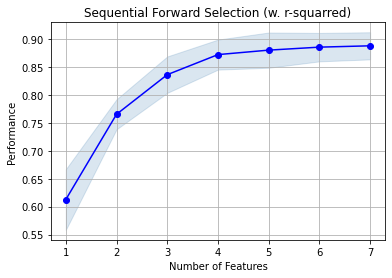

In [73]:
fig = plot_sfs(sfs3.get_metric_dict())

plt.title('Sequential Forward Selection (w. r-squarred)')

plt.grid()
plt.show()

In [74]:
sfs3.k_feature_names_

('gdp_per_capita',
 'health',
 'cpi_score',
 'freedom',
 'government_trust',
 'social_support',
 'dystopia_residual')

In [75]:
GBregress = GradientBoostingRegressor(**params)

GBregress.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          subsample=0.1)

In [76]:
y_test_pred = GBregress.predict(X_test)
print('Testing accuracy on selected features: %.3f' % r2_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.918


# Gradient Boosting
## Feature Selection
### Regression

In [77]:
sfs3 = SFS(GBR, 
          k_features=5, 
          forward=True, 
          floating=False,
          verbose=2,
          scoring='r2',
          cv=5)
sfs3 = sfs3.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s finished

[2022-06-29 16:34:29] Features: 1/5 -- score: 0.6125907656764207[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s finished

[2022-06-29 16:34:30] Features: 2/5 -- score: 0.7649521976707085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished

[2022-06-29 16:34:32] Features: 3/5 -- score: 0.8362740006296171[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [78]:
sfs3.k_feature_names_

('gdp_per_capita', 'health', 'freedom', 'social_support', 'dystopia_residual')

In [79]:
feat_cols = list(sfs3.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 5, 6]


In [80]:
GBregress = GradientBoostingRegressor(**params)

GBregress.fit(X_train.iloc[:, feat_cols], y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          subsample=0.1)

In [81]:
y_test_pred = GBregress.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % r2_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.905
